# 07 — Simple Linear Regression (Vectorized Implementation)

In this notebook, we will:
- Eliminate explicit Python loops
- Leverage NumPy vectorization
- Implement SLR with better performance
- Compare the result to manual implementation

## Step 1: Importing Required Libraries

We use:
- NumPy for numerical operations
- Matplotlib & Seaborn for visualizations

In [9]:
# ✅ Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 3)

## Step 2: Generating Synthetic Data

Our target function is:

y = 3x + 4 + noise


In [3]:
# ✅ Step 2: Generate Synthetic Data
np.random.seed(42)
X = np.linspace(0, 10, 50)
noise = np.random.normal(0, 2, X.shape)
y = 3 * X + 4 + noise

## Step 3: Add Bias Term for Intercept

We create an extended matrix  X_b with an added column of 1s for intercept term:


X_b = [1, x_1], [1, x_2], ..., [1, x_n]


In [4]:
# ✅ Step 3: Reshape Data & Add Intercept Term
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term

## Step 4: Initialize Parameters

In [5]:
# ✅ Step 4: Initialize Parameters
theta = np.zeros((2, 1))
alpha = 0.01
n_iterations = 1000
n = len(X)
cost_history = []

## Step 5: Vectorized Gradient Descent

Instead of looping:
- We compute all gradients at once using matrix multiplication
- Efficient and faster

In [6]:
# ✅ Step 5: Vectorized Gradient Descent
for _ in range(n_iterations):
    y_pred = X_b @ theta
    error = y_pred - y
    cost = (1/n) * np.sum(error**2)
    cost_history.append(cost)

    gradients = (2/n) * X_b.T @ error
    theta = theta - alpha * gradients

## Step 6: Final Parameters

In [7]:
# ✅ Step 6: Final Parameters
print(f"θ₀ (intercept): {theta[0][0]:.4f}")
print(f"θ₁ (slope):     {theta[1][0]:.4f}")

θ₀ (intercept): 4.1058
θ₁ (slope):     2.8875


## Step 7: Cost Convergence Plot

We visualize the decreasing loss to ensure convergence is smooth.

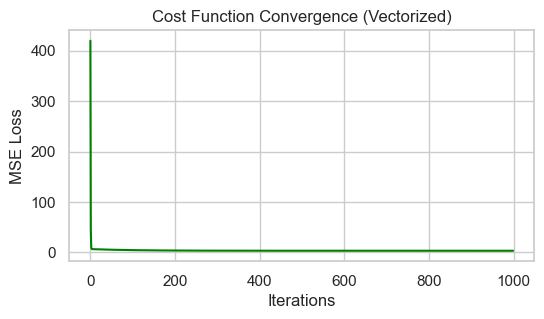

In [10]:
# ✅ Step 7: Plot Cost Over Time
plt.plot(range(n_iterations), cost_history, color="green")
plt.title("Cost Function Convergence (Vectorized)")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.show()

## Step 8: Plot Final Line

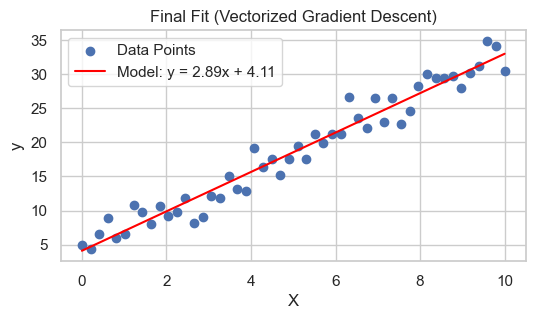

In [11]:
# ✅ Step 8: Plot Final Line
plt.scatter(X, y, label="Data Points")
plt.plot(X, X_b @ theta, color="red", label=f"Model: y = {theta[1][0]:.2f}x + {theta[0][0]:.2f}")
plt.title("Final Fit (Vectorized Gradient Descent)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()